In [31]:
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['figure.dpi'] = 100
plt.style.use("seaborn-colorblind")

9
9
9
9


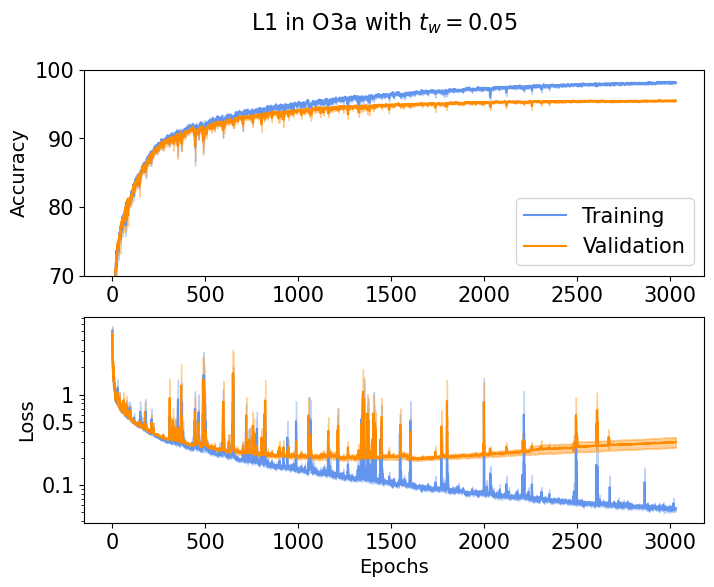

9
9
9
9


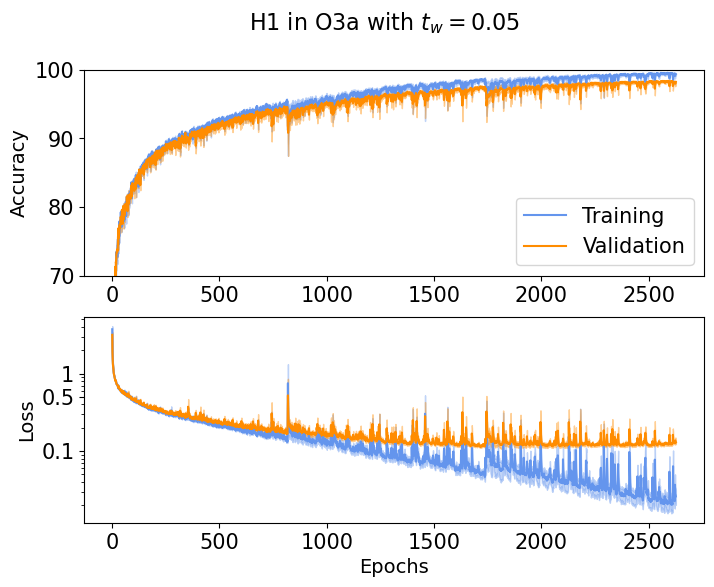

9
9
9
9


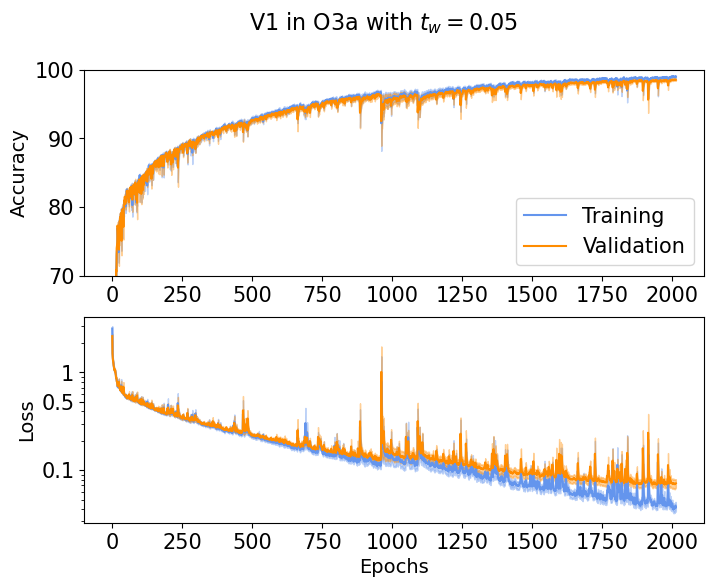

In [74]:
tw = 0.05
path = '../output/tw'+str(tw)+'/results/'

for file in np.sort(os.listdir(path)):
    if file.endswith('npy'):
        tmp = np.load(path + file, allow_pickle=True)

        if 'H1' in file: 
            title = r'H1 in O3a with $t_{w} = $'+str(tw)
        if 'L1' in file: 
            title = r'L1 in O3a with $t_{w} = $'+str(tw)
        if 'V1' in file: 
            title = r'V1 in O3a with $t_{w} = $'+str(tw)

        fig, ax = plt.subplots(2, 1)
        m, l = 0, 4000
        for k in range(9):
            length = len(tmp[0, k])
            if length < l:
                l = len(tmp[0, k])
        for i, color, label in zip(range(4),
                                   ['cornflowerblue', 'darkorange', 'cornflowerblue', 'darkorange'],
                                   ['Training', 'Validation', 'Training', 'Validation']):
            if i < 2:
                j = 0
                ax[j].set_ylabel('Accuracy')
                ax[j].set_ylim(70, 100)
            else: 
                j = 1
                ax[j].set_ylabel('Loss')
                ax[j].set_xlabel('Epochs')
                ax[j].set_yscale('log')
                ax[j].set_yticks([0.001, 0.01, 0.1, 0.5, 1], [0.001, 0.01, 0.1, 0.5, 1])

            means = list()
            for k in range(9):
                means.append(tmp[i, k][:l])
                m = max(x) + 1

            means = np.asarray(means)
            print(means.shape[0])
            upper = np.mean(means, axis=0) + 3*np.std(means, axis=0)/means.shape[0]
            lower = np.mean(means, axis=0) - 3*np.std(means, axis=0)/means.shape[0]
            means = np.mean(means, axis=0)
            ax[j].plot(means, c=color, label=label)
            #ax[j].plot(upper, alpha=0.5, c=color)
            #ax[j].plot(lower, alpha=0.5, c=color)
            ax[j].fill_between(np.arange(len(lower)), lower, upper, color=color, alpha=0.4)
        ax[0].legend()
        plt.suptitle(title, fontsize=16)
        plt.show()
